## makine ogrenmesinde artiklarin (hatalarin) onemi


In [1]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

x = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(x, y)

In [2]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [3]:
mse = mean_squared_error(y, model.fittedvalues)
mse

# mse = gercek degerler ile tahmin edilen degerler arasindaki farklarin karelerinin toplaminin ortalamasi
# birim basina yapilacak hata

10.512652915656757

In [4]:
import numpy as np

rmse = np.sqrt(mse)
rmse

# rmse = mse degerinin karekokunun alinmisi

3.2423221486546887

In [5]:
reg.predict(x)[0:10]

# tahmin edilen degerler

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [6]:
y[0:10]

# gercek degerler

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [7]:
karsilastirmaTablosu = pd.DataFrame(
    {"gercek_y": y[0:10], "tahmin_y": reg.predict(x)[0:10]}
)
karsilastirmaTablosu

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [8]:
karsilastirmaTablosu['hata'] = karsilastirmaTablosu['gercek_y'] - \
    karsilastirmaTablosu['tahmin_y']
karsilastirmaTablosu

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [9]:
karsilastirmaTablosu["hata_kare"] = karsilastirmaTablosu["hata"] ** 2
karsilastirmaTablosu

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [10]:
np.sum(karsilastirmaTablosu["hata_kare"])

# toplam hata

92.90350329638102

In [11]:
np.mean(karsilastirmaTablosu["hata_kare"])

# hata kareler ortalamasi

9.290350329638102

In [12]:
np.sqrt(np.mean(karsilastirmaTablosu["hata_kare"]))

# hata kareler ortalamasinin karekoku

3.048007599996775

In [13]:
model.resid[0:10]

# yukarıda hesapladigimiz artiklara (hatalara) direkt boyle de erisebiliriz

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

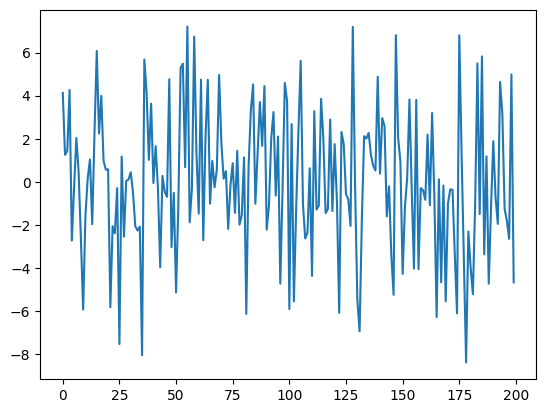

In [14]:
import matplotlib.pyplot as plt

plt.plot(model.resid)

# modelin hatalarinin gorsellestirilmesi